In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

df = pd.read_csv('eurusd_hour.csv')
df.head()

print(df)

df.rename(columns={
    'BO': 'Opening bid price',
    'BH': 'Highest bid price',
    'BL': 'Lowest bid price',
    'BC': 'Closing bid price',
    'BCh': 'Change between bid open and close price',
    'AO': 'Opening ask price',
    'AH': 'Highest ask price',
    'AL': 'Lowest ask price',
    'AC': 'Closing ask price',
    'ACh': 'Change between ask open and close price'
}, inplace=True)



             Date   Time       BO       BH       BL       BC      BCh  \
0      2005-05-02  00:00  1.28520  1.28520  1.28400  1.28440 -0.00080   
1      2005-05-02  01:00  1.28440  1.28480  1.28390  1.28420 -0.00020   
2      2005-05-02  02:00  1.28430  1.28540  1.28410  1.28510  0.00080   
3      2005-05-02  03:00  1.28510  1.28590  1.28500  1.28510  0.00000   
4      2005-05-02  04:00  1.28520  1.28590  1.28490  1.28550  0.00030   
...           ...    ...      ...      ...      ...      ...      ...   
93079  2020-04-29  18:00  1.08620  1.08851  1.08611  1.08713  0.00093   
93080  2020-04-29  19:00  1.08711  1.08823  1.08659  1.08748  0.00037   
93081  2020-04-29  20:00  1.08747  1.08788  1.08691  1.08708 -0.00039   
93082  2020-04-29  21:00  1.08708  1.08740  1.08699  1.08714  0.00006   
93083  2020-04-29  22:00  1.08728  1.08760  1.08727  1.08743  0.00015   

            AO       AH       AL       AC      ACh  
0      1.28540  1.28540  1.28420  1.28460 -0.00080  
1      1.28460  1

In [35]:
# Combine Date and Time into a single datetime column
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])

# Convert the datetime column to a numeric format (e.g., timestamp)
df['Timestamp'] = df['Datetime'].astype('int64') // 10**9  # Convert to seconds since epoch

# Alternatively, you could calculate the minutes since the start of the data
df['Minutes_Since_Start'] = (df['Datetime'] - df['Datetime'].min()).dt.total_seconds() / 60

# Drop the original Date and Time columns
df = df.drop(columns=['Date', 'Time', 'Datetime'])

# Display the resulting DataFrame
print(df.head())

   Opening bid price  Highest bid price  Lowest bid price  Closing bid price  \
0             1.2852             1.2852            1.2840             1.2844   
1             1.2844             1.2848            1.2839             1.2842   
2             1.2843             1.2854            1.2841             1.2851   
3             1.2851             1.2859            1.2850             1.2851   
4             1.2852             1.2859            1.2849             1.2855   

   Change between bid open and close price  Opening ask price  \
0                                  -0.0008             1.2854   
1                                  -0.0002             1.2846   
2                                   0.0008             1.2845   
3                                   0.0000             1.2853   
4                                   0.0003             1.2854   

   Highest ask price  Lowest ask price  Closing ask price  \
0             1.2854            1.2842             1.2846   
1     

In [37]:


x1 = df[['Minutes_Since_Start']]
y1 = df[['Opening bid price']]



In [38]:
# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size=0.2, random_state=42)


In [39]:
# Transform the data to include polynomial features
poly = PolynomialFeatures(degree=2)  # degree=2 for quadratic relationship
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

# Fit the model on the training data
model = LinearRegression()
model.fit(x_train_poly, y_train)

# Predict using the model on both training and testing data
y_train_pred = model.predict(x_train_poly)
y_test_pred = model.predict(x_test_poly)


In [40]:
# Calculate metrics for training data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for testing data
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R^2 Score: {train_r2}")
print(f"Testing Mean Squared Error: {test_mse}")
print(f"Testing R^2 Score: {test_r2}")


Training Mean Squared Error: 0.007498810374792284
Training R^2 Score: 0.5353036912571345
Testing Mean Squared Error: 0.00747981496395595
Testing R^2 Score: 0.5313479030089978


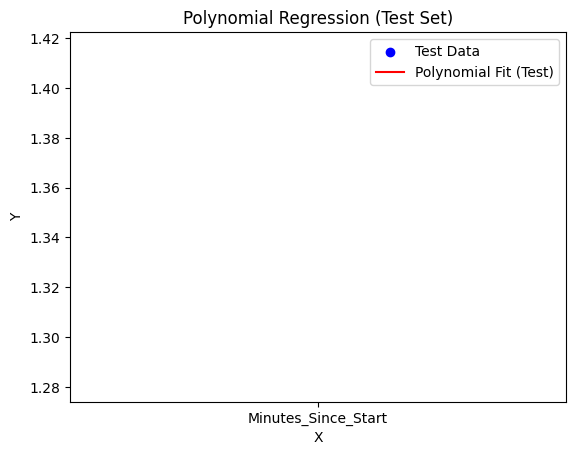

In [41]:
# Sort the test values for better visualization
import operator
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x_test, y_test_pred), key=sort_axis)
x_test_sorted, y_test_pred_sorted = zip(*sorted_zip)

plt.scatter(x_test, y_test, color='blue', label='Test Data')
plt.plot(x_test_sorted, y_test_pred_sorted, color='red', label='Polynomial Fit (Test)')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Polynomial Regression (Test Set)')
plt.legend()
plt.show()
